## Run trained models for qualitative analysis


In [1]:
import os
from collections import Counter
from copy import deepcopy
from glob import glob
import matplotlib.pyplot as plt

import torch
from tqdm.auto import tqdm
from humemai.utils import read_yaml, read_json

from agent import DQNAgent


num_tests = 20
train_dir = (
    "training-results/non-equal-object-probs/dqn/room_size=xxl-different-prob/"
    "capacity=192/2024-08-22 22:40:50.636184/"
)
model_path = glob(os.path.join(train_dir, "*.pt"))[0]
params = read_yaml(os.path.join(train_dir, "train.yaml"))
params["default_root_dir"] = "./training-results/TRASH"
results = read_yaml(os.path.join(train_dir, "results.yaml"))

stats_interest = [
    {
        "hidden_state": None,
        "state": [],
        "a_explore": [],
        "q_explore": [],
        "a_mm": [],
        "q_mm": [],
        "score": 0,
    }
    for _ in range(num_tests)
]


for seed in tqdm(range(num_tests)):
    params["test_seed"] = seed
    params["train_seed"] = seed
    agent = DQNAgent(**params)
    agent.dqn.load_state_dict(torch.load(model_path))

    done = True
    while True:
        if done:
            agent.reset()
            done = False

        else:
            state = deepcopy(agent.memory_systems.get_working_memory().to_list())
            (
                a_explore,
                q_explore,
                a_mm,
                q_mm,
                reward,
                intrinsic_explore_reward,
                answers,
                done,
            ) = agent.step(greedy=True)

            stats_interest[seed]["state"].append(state)
            stats_interest[seed]["a_explore"].append(a_explore)
            stats_interest[seed]["q_explore"].append(q_explore)
            stats_interest[seed]["a_mm"].append(a_mm)
            stats_interest[seed]["q_mm"].append(q_mm)
            stats_interest[seed]["score"] += reward

        if done:
            stats_interest[seed]["hidden_state"] = deepcopy(
                agent.env.unwrapped.hidden_global_states_all
            )

            break

for idx in range(num_tests):
    print(
        idx,
        ": ",
        stats_interest[idx]["score"],
        "\t",
        Counter([bar for foo in stats_interest[idx]["a_mm"] for bar in foo.tolist()]),
        Counter([foo.item() for foo in stats_interest[idx]["a_explore"]]),
    )

string_map = read_json(
    "./trained-results/non-equal-object-probs/dqn/"
    "room_size=xxl-different-prob/capacity=192/"
    "2024-08-12 12:58:16.107541/generic-to-realistic-mapping.json"
)

/home/tk/.virtualenvs/agent-room-env-v2-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/20 [00:00<?, ?it/s]/home/tk/.virtualenvs/agent-room-env-v2-gnn/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:168: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.deprecation(
/home/tk/.virtualenvs/agent-room-env-v2-gnn/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/home/tk/.virtualenvs/agent-room-env-v2-gnn

Running on cpu


  5%|▌         | 1/20 [00:00<00:18,  1.04it/s]

Running on cpu


 10%|█         | 2/20 [00:02<00:18,  1.02s/it]

Running on cpu


 15%|█▌        | 3/20 [00:03<00:17,  1.05s/it]

Running on cpu


 20%|██        | 4/20 [00:04<00:17,  1.10s/it]

Running on cpu


 25%|██▌       | 5/20 [00:05<00:16,  1.08s/it]

Running on cpu


 30%|███       | 6/20 [00:06<00:14,  1.02s/it]

Running on cpu


 35%|███▌      | 7/20 [00:07<00:13,  1.05s/it]

Running on cpu


 40%|████      | 8/20 [00:08<00:12,  1.03s/it]

Running on cpu


 45%|████▌     | 9/20 [00:09<00:11,  1.07s/it]

Running on cpu


 50%|█████     | 10/20 [00:10<00:10,  1.05s/it]

Running on cpu


 55%|█████▌    | 11/20 [00:11<00:09,  1.07s/it]

Running on cpu


 60%|██████    | 12/20 [00:12<00:08,  1.08s/it]

Running on cpu


 65%|██████▌   | 13/20 [00:13<00:07,  1.12s/it]

Running on cpu


 70%|███████   | 14/20 [00:14<00:06,  1.08s/it]

Running on cpu


 75%|███████▌  | 15/20 [00:16<00:05,  1.10s/it]

Running on cpu


 80%|████████  | 16/20 [00:17<00:04,  1.07s/it]

Running on cpu


 85%|████████▌ | 17/20 [00:18<00:03,  1.04s/it]

Running on cpu


 90%|█████████ | 18/20 [00:19<00:02,  1.07s/it]

Running on cpu


 95%|█████████▌| 19/20 [00:20<00:01,  1.05s/it]

Running on cpu


100%|██████████| 20/20 [00:21<00:00,  1.05s/it]

0 :  116 	 Counter({2: 204, 0: 202, 1: 137}) Counter({2: 64, 1: 26, 3: 10})
1 :  180 	 Counter({2: 354, 1: 181, 0: 84}) Counter({1: 58, 2: 29, 0: 10, 3: 3})
2 :  91 	 Counter({2: 285, 0: 214, 1: 117}) Counter({2: 45, 1: 42, 3: 13})
3 :  154 	 Counter({2: 382, 1: 161, 0: 72}) Counter({1: 68, 2: 21, 3: 10, 0: 1})
4 :  207 	 Counter({2: 384, 1: 160, 0: 66}) Counter({2: 66, 1: 29, 0: 3, 3: 2})
5 :  178 	 Counter({2: 358, 1: 150, 0: 101}) Counter({1: 83, 2: 9, 3: 8})
6 :  177 	 Counter({2: 337, 1: 195, 0: 69}) Counter({1: 77, 3: 12, 2: 10, 0: 1})
7 :  160 	 Counter({2: 363, 1: 149, 0: 86}) Counter({1: 75, 2: 15, 3: 10})
8 :  131 	 Counter({2: 354, 1: 190, 0: 75}) Counter({1: 74, 2: 19, 3: 6, 0: 1})
9 :  143 	 Counter({2: 377, 1: 161, 0: 81}) Counter({1: 68, 2: 21, 0: 10, 3: 1})
10 :  96 	 Counter({0: 246, 2: 224, 1: 120}) Counter({2: 45, 3: 33, 1: 22})
11 :  173 	 Counter({2: 364, 1: 180, 0: 72}) Counter({1: 56, 2: 36, 3: 7, 0: 1})
12 :  179 	 Counter({2: 395, 1: 158, 0: 63}) Counter({1: 68

### Choose the best index

In [2]:
idx_of_interest = 4

### Last hidden state of the environment

In [7]:
last_hidden_state = [foo for foo in stats_interest[idx_of_interest]["hidden_state"]][-2]
for line in last_hidden_state:
    line_modified = []
    for item in line:
        if item in string_map:
            line_modified.append(string_map[item])
        else:
            line_modified.append(item)

    print(line_modified)

['Foyer', 'north', 'wall', 99]
['Foyer', 'east', 'Living', 99]
['Foyer', 'south', 'Study', 99]
['Foyer', 'west', 'wall', 99]
['Living', 'north', 'wall', 99]
['Living', 'east', 'wall', 99]
['Living', 'south', 'Library', 99]
['Living', 'west', 'Foyer', 99]
['Den', 'north', 'wall', 99]
['Den', 'east', 'wall', 99]
['Den', 'south', 'Gym', 99]
['Den', 'west', 'wall', 99]
['Office', 'north', 'wall', 99]
['Office', 'east', 'Kitchen', 99]
['Office', 'south', 'Bath', 99]
['Office', 'west', 'wall', 99]
['Kitchen', 'north', 'wall', 99]
['Kitchen', 'east', 'wall', 99]
['Kitchen', 'south', 'Lounge', 99]
['Kitchen', 'west', 'Office', 99]
['Dining', 'north', 'wall', 99]
['Dining', 'east', 'Study', 99]
['Dining', 'south', 'Studio', 99]
['Dining', 'west', 'wall', 99]
['Study', 'north', 'Foyer', 99]
['Study', 'east', 'Library', 99]
['Study', 'south', 'Pantry', 99]
['Study', 'west', 'Dining', 99]
['Library', 'north', 'Living', 99]
['Library', 'east', 'Sunroom', 99]
['Library', 'south', 'wall', 99]
['Libra

### Agent's memory at the last time step

In [ ]:
counts = {}
last_state = [foo for foo in stats_interest[idx_of_interest]["state"]][-1]
for line in last_state:
    line_modified = []
    head, relation, tail, quals = line
    if head in string_map:
        head_ = string_map[head]
        if head_ not in counts:
            counts[head_] = 1
        else:
            counts[head_] += 1
    if tail in string_map:
        tail_ = string_map[tail]

        if tail_ not in counts:
            counts[tail_] = 1
        else:
            counts[tail_] += 1

    print([head_, relation, tail_, quals])

In [11]:
# sort by the value
dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

{'Agent': 1}

### The types of memories at the last time step

In [12]:
from pprint import pprint

semantic_mems = []
episodic_mems = []
both_mems = []
short_mems = []

print("Last state. num_mems: ", len(last_state))
print()
for quadruple in last_state:

    head, relation, tail, quals = quadruple

    if "timestamp" in quals and "strength" in quals:
        both_mems.append((head, relation, tail))
    elif "timestamp" in quals:
        episodic_mems.append((head, relation, tail))
    elif "strength" in quals:
        semantic_mems.append((head, relation, tail))
    else:
        short_mems.append((head, relation, tail))

print(f"Episodic memories. num_types: num_mems: {len(episodic_mems)}")
pprint(episodic_mems)
print()
print(f"Semantic memories. num_types: num_mems: {len(semantic_mems)}")
pprint(semantic_mems)
print()
print(f"Both memories. num_types: num_mems: {len(both_mems)}")
pprint(both_mems)
print()
print(f"Short memories. num_types: num_mems: {len(short_mems)}")
pprint(short_mems)
print()

Last state. num_mems:  61

Episodic memories. num_types: num_mems: 20
[('room_000', 'east', 'room_001'),
 ('agent', 'atlocation', 'room_000'),
 ('sta_008', 'atlocation', 'room_000'),
 ('ind_005', 'atlocation', 'room_000'),
 ('room_000', 'north', 'wall'),
 ('agent', 'atlocation', 'room_006'),
 ('room_013', 'west', 'room_012'),
 ('agent', 'atlocation', 'room_013'),
 ('room_019', 'west', 'room_018'),
 ('agent', 'atlocation', 'room_019'),
 ('dep_013', 'atlocation', 'room_023'),
 ('room_023', 'east', 'room_024'),
 ('agent', 'atlocation', 'room_024'),
 ('room_024', 'west', 'room_023'),
 ('agent', 'atlocation', 'room_031'),
 ('room_038', 'east', 'room_039'),
 ('dep_001', 'atlocation', 'room_045'),
 ('room_047', 'west', 'room_046'),
 ('room_063', 'south', 'wall'),
 ('agent', 'atlocation', 'room_054')]

Semantic memories. num_types: num_mems: 28
[('dep_002', 'atlocation', 'room_055'),
 ('room_000', 'south', 'room_006'),
 ('room_006', 'south', 'room_013'),
 ('room_013', 'east', 'wall'),
 ('room_

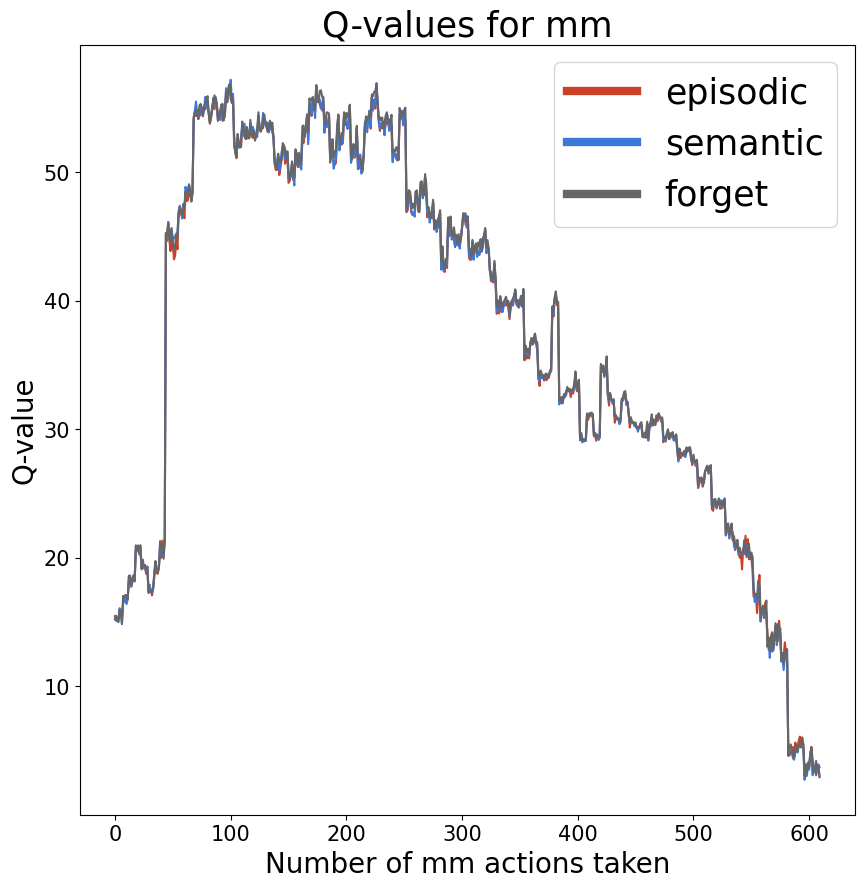

In [13]:
colors = ["#cc4125ff", "#3c78d8ff", "#666666ff"]  # episodic, semantic, forget
plt.figure(figsize=(10, 10))

for i in range(len(agent.action_mm2str)):
    plt.plot(
        [bar[i] for foo in stats_interest[idx_of_interest]["q_mm"] for bar in foo],
        label=agent.action_mm2str[i],
        color=colors[i],
    )

# Create the legend
leg = plt.legend(loc="best", fontsize=25)

# Change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(6.0)

plt.title("Q-values for mm", fontsize=25);
plt.xlabel("Number of mm actions taken", fontsize=20)
plt.ylabel("Q-value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("q_values_mm.pdf")
plt.show()

### Memory management actions taken

In [14]:
[
    (idx, agent.action_mm2str[foo])
    for idx, foo in enumerate(
        [bar for foo in stats_interest[idx_of_interest]["a_mm"] for bar in foo]
    )
]

[(0, 'episodic'),
 (1, 'forget'),
 (2, 'semantic'),
 (3, 'episodic'),
 (4, 'episodic'),
 (5, 'episodic'),
 (6, 'episodic'),
 (7, 'forget'),
 (8, 'semantic'),
 (9, 'forget'),
 (10, 'forget'),
 (11, 'episodic'),
 (12, 'semantic'),
 (13, 'semantic'),
 (14, 'forget'),
 (15, 'semantic'),
 (16, 'episodic'),
 (17, 'episodic'),
 (18, 'forget'),
 (19, 'episodic'),
 (20, 'episodic'),
 (21, 'forget'),
 (22, 'forget'),
 (23, 'episodic'),
 (24, 'forget'),
 (25, 'forget'),
 (26, 'semantic'),
 (27, 'forget'),
 (28, 'episodic'),
 (29, 'forget'),
 (30, 'semantic'),
 (31, 'episodic'),
 (32, 'forget'),
 (33, 'episodic'),
 (34, 'forget'),
 (35, 'forget'),
 (36, 'forget'),
 (37, 'semantic'),
 (38, 'episodic'),
 (39, 'forget'),
 (40, 'forget'),
 (41, 'episodic'),
 (42, 'forget'),
 (43, 'semantic'),
 (44, 'forget'),
 (45, 'forget'),
 (46, 'episodic'),
 (47, 'semantic'),
 (48, 'semantic'),
 (49, 'forget'),
 (50, 'semantic'),
 (51, 'semantic'),
 (52, 'semantic'),
 (53, 'semantic'),
 (54, 'semantic'),
 (55, 'se

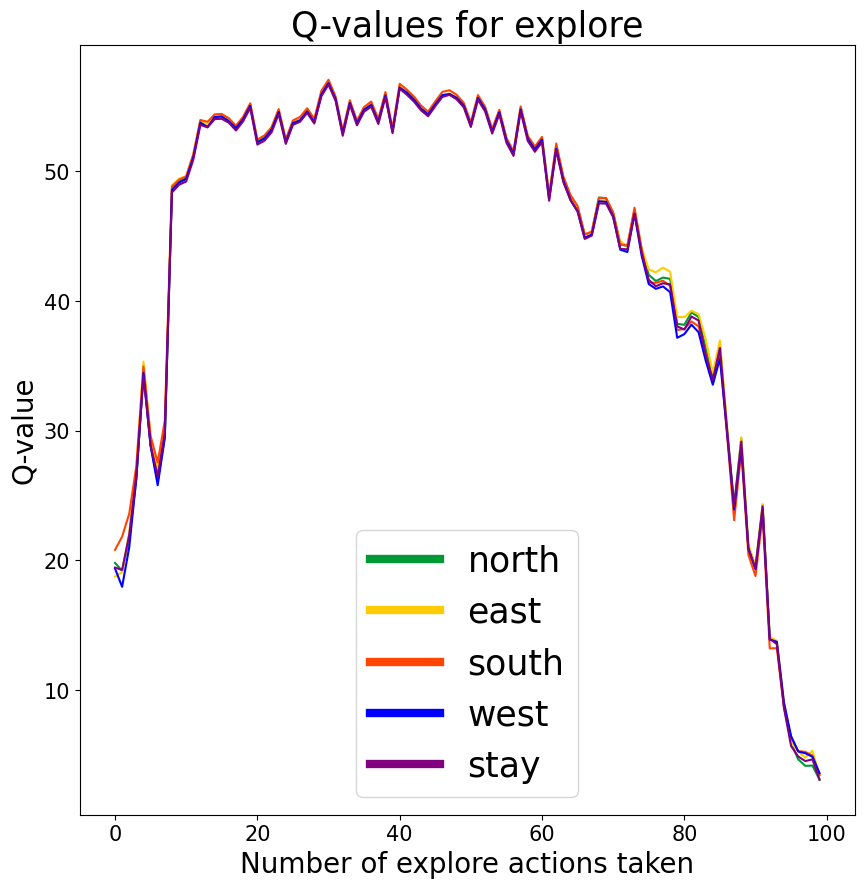

In [16]:
colors = ["#009933", "#ffcc00", "#ff4500", "#0000ff", "#800080"]
plt.figure(figsize=(10, 10))
for i in range(len(agent.action_explore2str)):
    plt.plot(
        [foo[0][i] for foo in stats_interest[idx_of_interest]["q_explore"]],
        label=agent.action_explore2str[i],
        color=colors[i],
    )

# Create the legend
leg = plt.legend(loc="best", fontsize=25)

# Change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(6.0)
    
# plt.legend(loc="best")
plt.title("Q-values for explore", fontsize=25)
plt.xlabel("Number of explore actions taken", fontsize=20)
plt.ylabel("Q-value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig("q_values_explore.pdf")
plt.show()

### Explore actions taken

In [18]:
[
    (idx, agent.action_explore2str[foo[0]])
    for idx, foo in enumerate(stats_interest[idx_of_interest]["a_explore"])
]

[(0, 'south'),
 (1, 'south'),
 (2, 'south'),
 (3, 'south'),
 (4, 'east'),
 (5, 'south'),
 (6, 'south'),
 (7, 'south'),
 (8, 'east'),
 (9, 'east'),
 (10, 'east'),
 (11, 'south'),
 (12, 'south'),
 (13, 'south'),
 (14, 'south'),
 (15, 'south'),
 (16, 'south'),
 (17, 'south'),
 (18, 'south'),
 (19, 'south'),
 (20, 'south'),
 (21, 'east'),
 (22, 'east'),
 (23, 'south'),
 (24, 'south'),
 (25, 'south'),
 (26, 'south'),
 (27, 'south'),
 (28, 'south'),
 (29, 'south'),
 (30, 'south'),
 (31, 'south'),
 (32, 'south'),
 (33, 'south'),
 (34, 'south'),
 (35, 'south'),
 (36, 'south'),
 (37, 'south'),
 (38, 'south'),
 (39, 'south'),
 (40, 'south'),
 (41, 'south'),
 (42, 'south'),
 (43, 'south'),
 (44, 'south'),
 (45, 'south'),
 (46, 'south'),
 (47, 'south'),
 (48, 'south'),
 (49, 'south'),
 (50, 'south'),
 (51, 'south'),
 (52, 'south'),
 (53, 'south'),
 (54, 'south'),
 (55, 'south'),
 (56, 'south'),
 (57, 'south'),
 (58, 'south'),
 (59, 'south'),
 (60, 'south'),
 (61, 'north'),
 (62, 'south'),
 (63, 's

### Agent's locations

In [19]:
visited = []

for idx, foo in enumerate(stats_interest[idx_of_interest]["state"]):
    for bar in foo:
        if bar[0] == "agent" and bar[1] == "atlocation" and "current_time" in bar[-1]:
            print(f"At time {idx}\t agent at {bar[2]}")
            visited.append(bar[2])

At time 0	 agent at room_000
At time 1	 agent at room_006
At time 2	 agent at room_013
At time 3	 agent at room_019
At time 4	 agent at room_023
At time 5	 agent at room_024
At time 6	 agent at room_031
At time 7	 agent at room_038
At time 8	 agent at room_045
At time 9	 agent at room_046
At time 10	 agent at room_047
At time 11	 agent at room_048
At time 12	 agent at room_054
At time 13	 agent at room_054
At time 14	 agent at room_054
At time 15	 agent at room_054
At time 16	 agent at room_054
At time 17	 agent at room_054
At time 18	 agent at room_054
At time 19	 agent at room_054
At time 20	 agent at room_054
At time 21	 agent at room_054
At time 22	 agent at room_055
At time 23	 agent at room_055
At time 24	 agent at room_063
At time 25	 agent at room_063
At time 26	 agent at room_063
At time 27	 agent at room_063
At time 28	 agent at room_063
At time 29	 agent at room_063
At time 30	 agent at room_063
At time 31	 agent at room_063
At time 32	 agent at room_063
At time 33	 agent at

In [20]:
Counter(visited)

Counter({'room_063': 62,
         'room_054': 13,
         'room_055': 13,
         'room_000': 1,
         'room_006': 1,
         'room_013': 1,
         'room_019': 1,
         'room_023': 1,
         'room_024': 1,
         'room_031': 1,
         'room_038': 1,
         'room_045': 1,
         'room_046': 1,
         'room_047': 1,
         'room_048': 1})